# Rice Leaf Disease Detection using Convolutional Neural Networks (CNN)

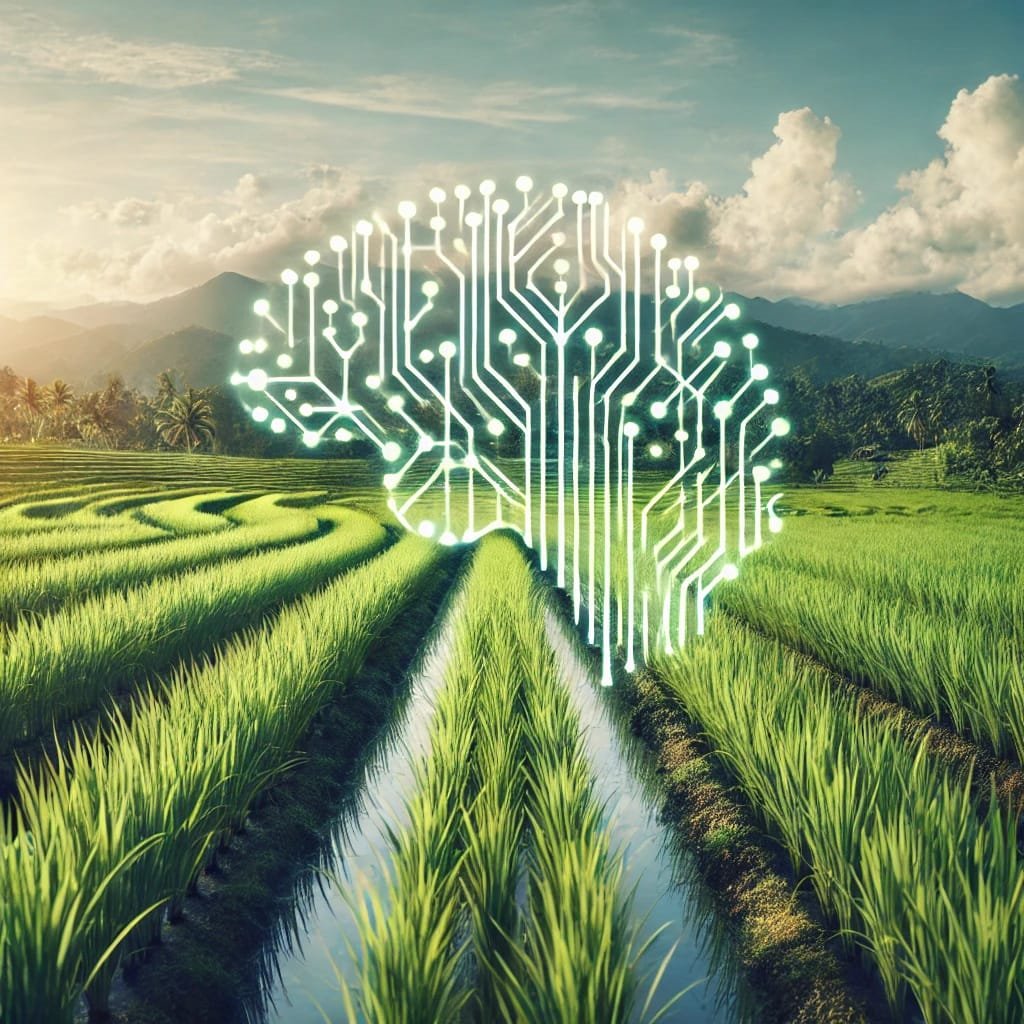

In [1]:
from IPython.display import Image

# Provide the path to your image file
image_path = "D:\DataMites\Project\Image Processing_1\image.png"

# Display the image
Image(filename=image_path, width = 512, height = 512)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import warnings
warnings.filterwarnings("ignore")

# Define the path to the data directory
data_dir = r'D:\DataMites\Project\Image Processing_1\Leaf_Folder'

In [3]:
# Load and preprocess the dataset
def load_and_preprocess_dataset(data_dir, image_size=(224, 224), batch_size=16):
    # Load dataset with split for training and validation
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        image_size=image_size,
        batch_size=batch_size,
        label_mode='int',
        shuffle=True,
        validation_split=0.2,
        subset="training",
        seed=123
    )
    
    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        image_size=image_size,
        batch_size=batch_size,
        label_mode='int',
        shuffle=True,
        validation_split=0.2,
        subset="validation",
        seed=123
    )
    
    # Normalize the datasets
    normalization_layer = layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))
    validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

    # Data augmentation for training set
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
    ])
    dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
    
    return dataset, validation_dataset

In [4]:
# Define the model using Transfer Learning
def create_model(input_shape=(224, 224, 3), num_classes=3):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model layers
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [5]:
# Compile the model
def compile_model(model):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [6]:
# Train the model
def train_model(model, train_dataset, validation_dataset, epochs=250):
    history = model.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=epochs
    )
    return history

In [7]:
# Evaluate the model
def evaluate_model(model, validation_dataset):
    loss, accuracy = model.evaluate(validation_dataset)
    print(f'Validation Loss: {loss:.4f}')
    print(f'Validation Accuracy: {accuracy:.4f}')

In [8]:
# Predict and visualize actual vs. predicted outputs
def predict_and_visualize(model, dataset, data_dir, num_images=5):
    # Manually retrieve class names
    class_names = sorted([item for item in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, item))])
    
    # Get a batch of images and labels
    images, labels = next(iter(dataset))
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Display images with actual and predicted labels
    plt.figure(figsize=(15, 15))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f'Actual: {class_names[labels[i].numpy()]} \nPredicted: {class_names[predicted_labels[i]]}')
        plt.axis('off')
    plt.show()

In [9]:
# Execute the data loading, model creation, and training
train_dataset, validation_dataset = load_and_preprocess_dataset(data_dir)
model = create_model()
compile_model(model)

Found 119 files belonging to 3 classes.
Using 96 files for training.
Found 119 files belonging to 3 classes.
Using 23 files for validation.


In [10]:
history = train_model(model, train_dataset, validation_dataset)

Epoch 1/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 942ms/step - accuracy: 0.3918 - loss: 1.6619 - val_accuracy: 0.3043 - val_loss: 1.6238
Epoch 2/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 670ms/step - accuracy: 0.3991 - loss: 1.5539 - val_accuracy: 0.3043 - val_loss: 1.2561
Epoch 3/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 669ms/step - accuracy: 0.3179 - loss: 1.4455 - val_accuracy: 0.3478 - val_loss: 1.0837
Epoch 4/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 694ms/step - accuracy: 0.4625 - loss: 1.0462 - val_accuracy: 0.5217 - val_loss: 0.9661
Epoch 5/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 670ms/step - accuracy: 0.5542 - loss: 1.0129 - val_accuracy: 0.5217 - val_loss: 0.9098
Epoch 6/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 671ms/step - accuracy: 0.6396 - loss: 0.8164 - val_accuracy: 0.6087 - val_loss: 0.8718
Epoch 7/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 669ms/step - accuracy: 0.4938 - loss: 0.9664 - val_accuracy: 0.6522 - val_loss: 0.8436
Epoch 8/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 688ms/step - accuracy: 0.5199 - loss: 0.9265 - val_accuracy: 0.6087 - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 660ms/step - accuracy: 0.9766 - loss: 0.0754 - val_accuracy: 0.8261 - val_loss: 0.4003
Epoch 102/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 668ms/step - accuracy: 0.9970 - loss: 0.1149 - val_accuracy: 0.8261 - val_loss: 0.3970
Epoch 103/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 649ms/step - accuracy: 0.9637 - loss: 0.0968 - val_accuracy: 0.8261 - val_loss: 0.3905
Epoch 104/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 649ms/step - accuracy: 1.0000 - loss: 0.0869 - val_accuracy: 0.8261 - val_loss: 0.3872
Epoch 105/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 651ms/step - accuracy: 0.9756 - loss: 0.0879 - val_accuracy: 0.8261 - val_loss: 0.3888
Epoch 106/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 666ms/step - accuracy: 0.9801 - loss: 0.0804 - val_accuracy: 0.8261 - val_loss: 0.4064
Epoch 107/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 650ms/step - accuracy: 0.9753 - loss: 0.1097 - val_accuracy: 0.8261 - val_loss: 0.4033
Epoch 108/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 689ms/step - accuracy: 0.9900 - loss: 0.0758 - val_accuracy: 0.8696 -

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 685ms/step - accuracy: 1.0000 - loss: 0.0365 - val_accuracy: 0.9130 - val_loss: 0.2581
Epoch 202/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 664ms/step - accuracy: 1.0000 - loss: 0.0257 - val_accuracy: 0.9130 - val_loss: 0.2589
Epoch 203/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 662ms/step - accuracy: 1.0000 - loss: 0.0255 - val_accuracy: 0.9130 - val_loss: 0.2561
Epoch 204/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 666ms/step - accuracy: 0.9930 - loss: 0.0330 - val_accuracy: 0.9130 - val_loss: 0.2539
Epoch 205/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 697ms/step - accuracy: 0.9856 - loss: 0.0391 - val_accuracy: 0.9130 - val_loss: 0.2562
Epoch 206/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 768ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 0.9130 - val_loss: 0.2621
Epoch 207/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 991ms/step - accuracy: 1.0000 - loss: 0.0244 - val_accuracy: 0.9130 - val_loss: 0.2710
Epoch 208/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0280 - val_accuracy: 0.9130 - va

In [11]:
val_acc = history.history['val_accuracy']
best_epoch = np.argmax(val_acc) + 1  # +1 because epochs are 1-indexed
best_val_acc = val_acc[best_epoch - 1]

print(f"Best Validation Accuracy: {best_val_acc:.4f} at Epoch {best_epoch}")

Best Validation Accuracy: 0.9130 at Epoch 149


In [12]:
# Evaluate and visualize
evaluate_model(model, validation_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.9212 - loss: 0.2767
Validation Loss: 0.3206
Validation Accuracy: 0.9130


In [17]:
# Save the trained model
model.save('bacterial_leaf_disease_model.h5')

# Conclusion
Model Effectiveness:
    With an accuracy of 91%, the model is quite effective in predicting "Bacterial Leaf Disease". It can be confidently used for practical applications such as in-field disease detection and diagnosis.
Next Steps:
    Further Improvements: Although 86% is strong, further improvements could be achieved by gathering more data, fine-tuning the model further, or experimenting with other architectures.
Deployment: The model can be deployed in a real-world scenario where it can assist farmers and agronomists in diagnosing bacterial leaf diseases more accurately and efficiently.